In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import requests
import time
from bs4 import BeautifulSoup as bs
import re
import pandas as pd

# load_ap0cone and autoencoder

## 1. load_ap0cone

In [3]:
df=pd.read_csv('../data/df_full_image_url.csv')

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
df=df.dropna()

In [7]:
df

,product_name,designer_name,designer_page,designer_description,product_suffix,product_page,product_page_response,product_image_url,num
0,Infinity Pants,A Beautiful Orgasm,https://ap0cene.com/collections/a-beautiful-or...,Lucky Truong is a self-taught designer based i...,/collections/a-beautiful-orgasm/products/infin...,https://ap0cene.com/collections/a-beautiful-or...,True,http://cdn.shopify.com/s/files/1/0542/1803/12...,0
1,Infinity Pants,A Beautiful Orgasm,https://ap0cene.com/collections/a-beautiful-or...,Lucky Truong is a self-taught designer based i...,/collections/a-beautiful-orgasm/products/infin...,https://ap0cene.com/collections/a-beautiful-or...,True,http://cdn.shopify.com/s/files/1/0542/1803/12...,1
2,Infinity Pants,A Beautiful Orgasm,https://ap0cene.com/collections/a-beautiful-or...,Lucky Truong is a self-taught designer based i...,/collections/a-beautiful-orgasm/products/infin...,https://ap0cene.com/collections/a-beautiful-or...,True,http://cdn.shopify.com/s/files/1/0542/1803/12...,2
3,Infinity Pants,A Beautiful Orgasm,https://ap0cene.com/collections/a-beautiful-or...,Lucky Truong is a self-taught designer based i...,/collections/a-beautiful-orgasm/products/infin...,https://ap0cene.com/collections/a-beautiful-or...,True,http://cdn.shopify.com/s/files/1/0542/1803/12...,3
4,Infinity Pants,A Beautiful Orgasm,https://ap0cene.com/collections/a-beautiful-or...,Lucky Truong is a self-taught designer based i...,/collections/a-beautiful-orgasm/products/infin...,https://ap0cene.com/collections/a-beautiful-or...,True,http://cdn.shopify.com/s/files/1/0542/1803/12...,4
...,...,...,...,...,...,...,...,...,...
12778,Teddy Boots Blue,Zemeta,https://ap0cene.com/collections/zemeta-1,Zemeta is a New York City based female designe...,/collections/zemeta-1/products/peachy-gloss-boots,https://ap0cene.com/collections/zemeta-1/produ...,True,http://cdn.shopify.com/s/files/1/0542/1803/12...,12778
12779,Teddy Boots Blue,Zemeta,https://ap0cene.com/collections/zemeta-1,Zemeta is a New York City based female designe...,/collections/zemeta-1/products/peachy-gloss-boots,https://ap0cene.com/collections/zemeta-1/produ...,True,http://cdn.shopify.com/s/files/1/0542/1803/12...,12779
12780,Teddy Boots Blue,Zemeta,https://ap0cene.com/collections/zemeta-1,Zemeta is a New York City based female designe...,/collections/zemeta-1/products/peachy-gloss-boots,https://ap0cene.com/collections/zemeta-1/produ...,True,http://cdn.shopify.com/s/files/1/0542/1803/12...,12780
12781,Teddy Boots Blue,Zemeta,https://ap0cene.com/collections/zemeta-1,Zemeta is a New York City based female designe...,/collections/zemeta-1/products/peachy-gloss-boots,https://ap0cene.com/collections/zemeta-1/produ...,True,http://cdn.shopify.com/s/files/1/0542/1803/12...,12781


## 2. Embedding

In [8]:
from PIL import Image

In [ ]:
def load_image_nparray(num):
    

In [10]:
!ls ../images

image_12520.jpg image_12780.jpg image_12782.jpg image_9839.jpg
image_12665.jpg image_12781.jpg image_9426.jpg


In [44]:
img_ls="image_12520.jpg image_12780.jpg image_12782.jpg image_9839.jpg image_12665.jpg image_12781.jpg image_9426.jpg".split()

In [50]:
img_ls=[Image.open(f'../images/{img}').resize((360,360)) for img in img_ls]
img_ls

[<PIL.Image.Image image mode=RGB size=360x360>,
 <PIL.Image.Image image mode=RGB size=360x360>,
 <PIL.Image.Image image mode=RGB size=360x360>,
 <PIL.Image.Image image mode=RGBA size=360x360>,
 <PIL.Image.Image image mode=RGB size=360x360>,
 <PIL.Image.Image image mode=RGB size=360x360>,
 <PIL.Image.Image image mode=RGB size=360x360>]

In [68]:
img_data=[np.asarray(img, dtype="int64" )/255 if img.mode=="RGB" else np.asarray(img.convert('RGB'), dtype="int64" )/255 for img in img_ls ]

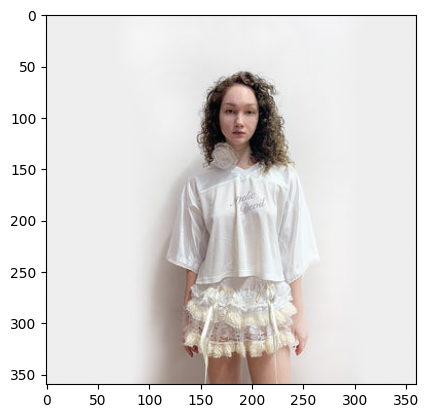

(360, 360, 3)


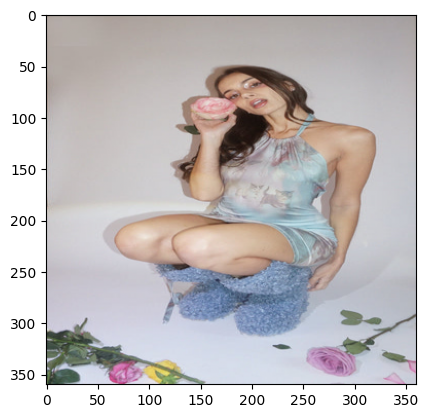

(360, 360, 3)


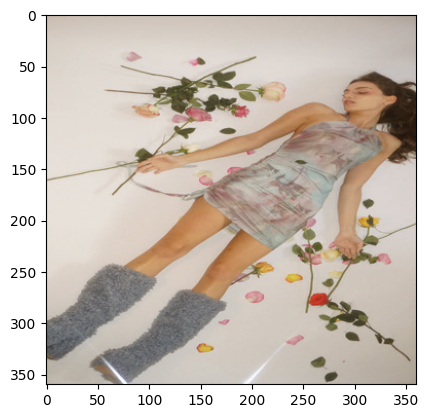

(360, 360, 3)


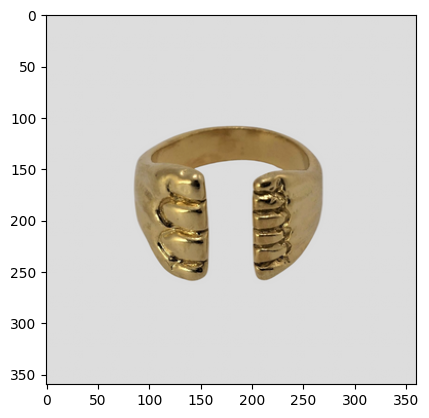

(360, 360, 3)


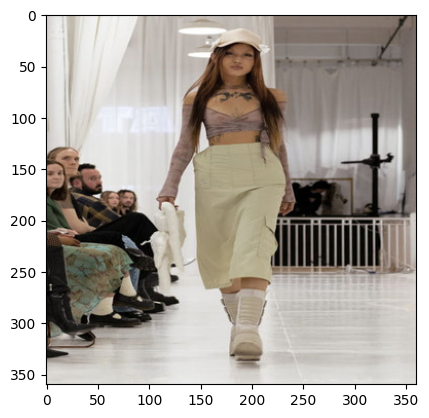

(360, 360, 3)


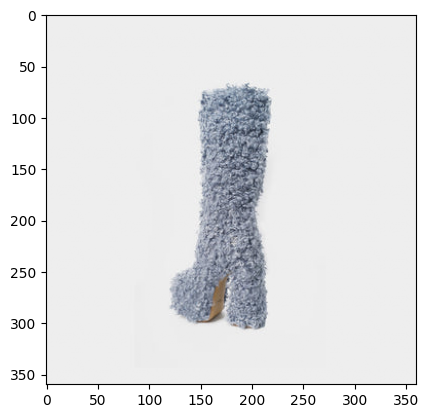

(360, 360, 3)


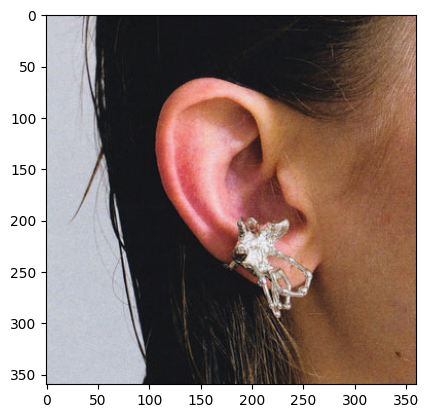

(360, 360, 3)


In [70]:
for dt in img_data:
    plt.imshow(dt)
    plt.show()
    print(dt.shape)

In [72]:
np.array(img_data).shape

(7, 360, 360, 3)